# Parte 1: Programación funcional

In [1]:
from Prices import get_prices
from Returns import get_returns
from Tsplot import get_tsplot

## Precios

In [2]:
symbols = symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOG",
    "XOM",
    "SNP",
    "EC",
    "TPL",
    "PFE",
    "NVS",
]

start = '2010-01-01'
end = '2022-08-12'
intervals = '1d'

prices = get_prices(symbols, start, end, intervals)

In [3]:
prices

,AAPL,AMZN,EC,GOOG,MSFT,NVS,PFE,SNP,TPL,XOM
Date,,,,,,,,,,
2010-01-04,6.526020,6.695000,12.046005,15.610239,23.749815,29.221478,11.223429,31.044287,26.051773,42.336403
2010-01-05,6.537304,6.734500,12.036331,15.541497,23.757486,29.193701,11.063350,30.715830,27.527411,42.501713
2010-01-06,6.433320,6.612500,12.094362,15.149715,23.611691,29.088171,11.027770,31.150240,26.829834,42.869057
2010-01-07,6.421425,6.500000,12.128216,14.797037,23.366133,28.832664,10.986272,30.662853,26.606255,42.734371
2010-01-08,6.464118,6.676000,12.253942,14.994298,23.527275,29.065947,11.075201,30.772337,25.935511,42.562923
...,...,...,...,...,...,...,...,...,...,...
2022-08-05,165.350006,140.800003,10.310000,118.220001,282.310760,85.570000,49.270000,45.230000,1656.819946,87.598862
2022-08-08,164.869995,139.410004,10.700000,118.139999,279.726257,85.940002,49.570000,46.060001,1710.939941,88.094055
2022-08-09,164.919998,137.830002,10.780000,117.500000,281.702057,87.150002,49.779999,46.830002,1711.000000,89.718269


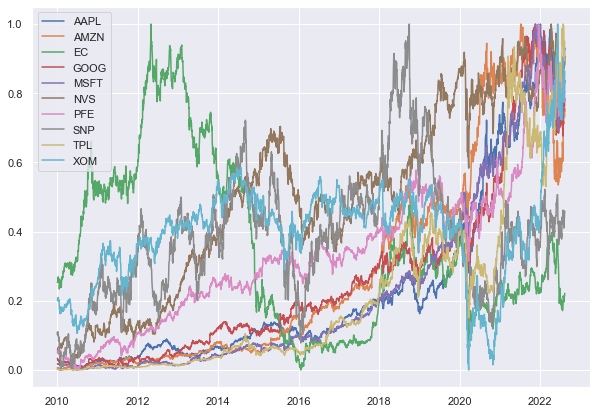

In [4]:
get_tsplot(time_series=prices,dates=prices.index, labels=prices.columns,normalize=True)

## Retornos 

In [5]:
returns = get_returns(prices=prices)

In [6]:
returns

array([[ 1.72756602e-03,  5.88255308e-03, -8.03416464e-04, ...,
        -1.06366372e-02,  5.50964239e-02,  3.89707183e-03],
       [-1.60340948e-02, -1.82817318e-02,  4.80974110e-03, ...,
         1.40437961e-02, -2.56677772e-02,  8.60590040e-03],
       [-1.85063273e-03, -1.71596491e-02,  2.79520643e-03, ...,
        -1.57700183e-02, -8.36815409e-03, -3.14673444e-03],
       ...,
       [ 3.03241779e-04, -1.13982030e-02,  7.44881707e-03, ...,
         1.65791381e-02,  3.51020736e-05,  1.82693675e-02],
       [ 2.58573616e-02,  3.46534071e-02,  1.85361108e-03, ...,
         1.91992246e-03,  1.11879118e-02,  9.44860903e-03],
       [-4.44142486e-03, -1.44710325e-02,  1.74395958e-02, ...,
         5.52609569e-03,  8.25938228e-03,  2.85174170e-02]])

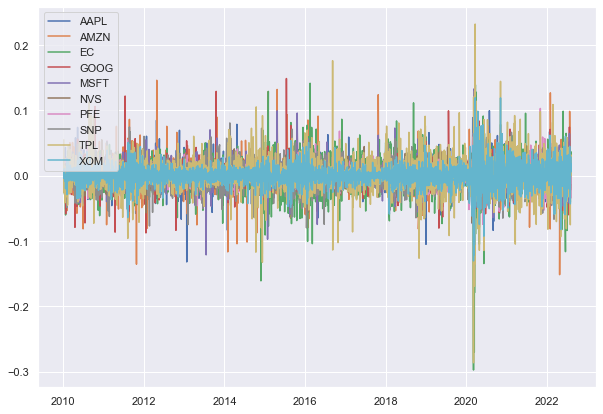

In [7]:
get_tsplot(time_series=returns,dates=prices.index[1:], labels=prices.columns,normalize=False)

# Parte 2: Teoría de portafolio 

¿Por qué surge la necesidad de  1) crear un portafolio y 2) optimizarlo?

Suponga que: como mal inversor por allá en el 2010 usted había visto el precio histórico de TPL (Texas Pacific Land), una operadora de bienes raíces con sede en Dallas, Texas. Debido a ese magnífico incremento usted decide invertir todo el patrimonio de su familia, digamos 100 unidades monetarias.

¿Cuál hubiese sido el "performance" o resultado de su inversión?

## Performance

In [8]:
import numpy as np
capital_inicial = 100

# Retorno de tpl diario desde 2010
r_tpl = returns[:,7]
n = len(r_tpl)
# Creamos un vector de ceros
performance = np.zeros((1, n)).T
performance[0] = capital_inicial
for i in range(n-1):
    performance[i+1] = performance[i] * np.exp(r_tpl[i])

performance

array([[100.        ],
       [ 98.94197318],
       [100.34129699],
       ...,
       [148.36868947],
       [150.84901851],
       [151.13891513]])

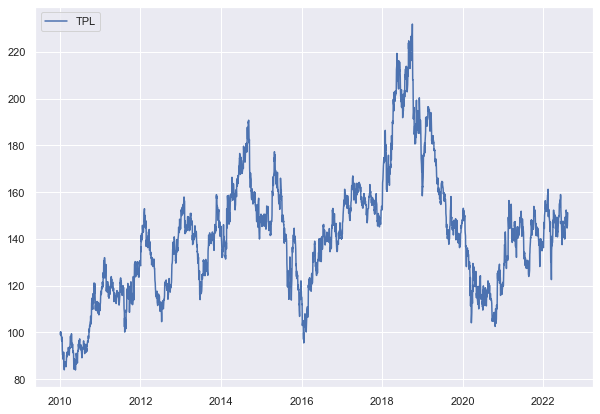

In [9]:
get_tsplot(time_series=performance, dates=prices.index[1:], labels=['TPL'], normalize=False)

### Drawdown máximo 

El máximo Drawdown mide que tanto se perdió desde el precio más alto al precio más bajo registrado luego del máximo

In [10]:
p_max = performance.max()
p_imax = performance.argmax()
p_after_pmax = performance[p_imax+1:,:]
p_min = p_after_pmax.min()

drawdawn = (p_max - p_min)/p_max
print(f"""
Drawdawn máximo : {round(drawdawn*100,2)}%
Es decir, en un determinado momento la estrategia perdió
el {round(drawdawn*100,2)}% del capital total
""")


Drawdawn máximo : 55.75%
Es decir, en un determinado momento la estrategia perdió
el 55.75% del capital total



Ahora suponga que usted como mal inversor asesoró a otras dos personas, pero en este caso les recomendó invertir en PFE y EC, construya el performance para cada activo, no es necesario que calcule el Drawdawn pero si es importante que grafique el resultado 

In [11]:
## Consejo:: construya una función get_performance() para que no repita código 

# Retornos de PFE
r_pfe = returns[:,8]

# Retornos de EC
r_ec = returns[:,6]

## Combinación lineal: lo mejor de dos mundos 

Ahora suponga que como buenos inversores que somos y aprendimos de nuestros errores ahora vamos a tomar una mejor decisión de inversión, tratando de "minimizar" el riesgo de perder todo el capital, diversificando nuestra inversión en TPL y en PFE ya que, TPL demostró un rendimiento muy alto pero con mucha volatilidad, sin embargo, PFE ha tenido un crecimiento constante al alza sin tanta volatilidad.

Diversificar nuestro portafolio implica que debemos repartir esas 100 unidades monetarias en ambos activos, ahora bien. ¿Cómo podríamos decidir que tanto invertir en TPL y que tanto en PFE? si por ejemplo quisieramos una rentabilidad promedio del 7%.

Bien, este ejercicio se puede resolver con un sistema de ecuaciones lineales de la forma:

\begin{align*}
    w_{tpl}r_{tpl} + w_{pfe}r_{pfe} = 7\%
\end{align*}

Si el retorno de TPL y PFE es, digamos: $r_{tpl} = 12\%$ y $r_{pfe} = 5\%$, será sencillo despejar cualquier $w_{i}$, por ejemplo $w_{pfe}$ sabiendo que $w_{tpl} = 1-w_{pfe}$ (ya que es una ponderación del 100%)

\begin{align*}
    w_{tpl}*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    (1-w_{pfe})*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    r_{tpl} - w_{pfe}*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    w_{pfe}*(r_{pfe}-r_{tpl}) &= 7\% - r_{tpl}\\
    w_{pfe} &= \frac{7\% - r_{tpl}}{r_{pfe}-r_{tpl}}\\
    w_{pfe} &= \frac{7\% - 12\%}{5\%-12\%} = \frac{0.07-0.12}{0.05-0.12}\\
    w_{pfe} &= 71.42\% = 0.7142
\end{align*}

Por tanto $w_{tpl} = 1 - 0.7142 = 0.2357$ 

In [93]:
##
r_target = 0.07

r_tpl = 0.12
r_pfe = 0.05

w_pfe1 = (r_target-r_tpl)/(r_pfe-r_tpl)
w_tpl1 = 1-w_pfe1

resultado1 = w_tpl1*r_tpl + w_pfe1*r_pfe
resultado1

0.07

¿Pero y que pasa cuando tenemos más de un retorno... un vector de retornos, digamos ... de 2 retornos para cada activo...?
por ejemplo $r_{pfe} = \{0.05, 0.09\}$ y $r_{tpl} = \{0.12, 0.08\}$

En ese caso tendríamos que resolver un sistema de 2 ecuaciones lineales simultáneas, de la forma:

\begin{align*}
    w_{tpl}*0.12 + w_{pfe}*0.05 &= 0.07\\
    w_{tpl}*0.08 + w_{pfe}*0.09 &= 0.07\\
\end{align*}

Podríamos resolver este problema con diversas técnicas, no obstante note que puedo reescribir este sistema de ecuaciones en su forma matricial:

\begin{align*}
    \left[
    \begin{matrix*}
         0.12 & 0.05\\
         0.08 & 0.09\\
    \end{matrix*}
    \right]_{2 \times 2}
    \times
    \left[
    \begin{matrix*}
        w_{tpl}\\
        w_{pfe}
    \end{matrix*}
    \right]_{2\times 1}
    &=
    \left[
    \begin{matrix*}
        0.07 \\
        0.07 \\
    \end{matrix*}
    \right]_{2 \times 1}\\
    \left[
    \begin{matrix*}
        w_{tpl}\\
        w_{pfe}
    \end{matrix*}
    \right]_{2\times 1}
    &=
    \left[
    \begin{matrix*}
         0.12 & 0.05\\
         0.08 & 0.09\\
    \end{matrix*}
    \right]_{2 \times 2}^{-1}
    \times
    \left[
    \begin{matrix*}
        0.07 \\
        0.07 \\
    \end{matrix*}
    \right]_{2 \times 1}
\end{align*}

Es decir, debemos multiplicar la matriz inversa de nuestros retornos por el vector de retorno deseado o esperado

In [95]:
R = np.array([[0.12,0.05],[0.08,0.09]])
R_target = np.array([0.07,0.07]).reshape((2,1))

W = np.linalg.inv(R) @ R_target
w_tpl2 = W[0,0]
w_pfe2 = W[1,0]


resultado2 = R @ W
resultado2

array([[0.07],
       [0.07]])

## Óptimo: ¿Qué es eso y cómo se come?

Graficamente ya vimos que podemos hacer infinitas combinaciones lineales entre 2 o más activos, pero ¿Cómo sabemos cuál es la mejor combinación lineal?... bueno matemáticamente un punto óptimo es el punto máximo o mínimo de una función. Note que nosotros pusimos un retorno objetivo arbitrariamente del $7\%$ pero sabemos que haciendo infinitas combinaciones lineales podemos alcanzar diferentes retornos. Entonces nuestro problema podría ser hallar la combinación lineal que nos dé el máximo retorno posible.

### Retorno máximo y primera restricción

Note que, cuando resolvimos el problema con dos ecuaciones lineales ambas ponderaciones $w_{i}$ nos daban lo mismo $0.411..$, pero al sumarlas el resultado era mayor a $1$, esto en finanzas puede verse como "apalancamiento", pero por el momento nosotros no vamos a coniderar ese tipo de problema, por ende nuestra primera restricción es asumir que $w_{1}+w_{2}=1$

Ahora, nuestra función a optimizar es el retorno del portafolio, dada por:
\begin{align*}
    R_{p} = w_{1}*r_{1} + w_{2}*r_{2}
\end{align*}

Sujeto a que si o si $w_{1}+w_{2}=1$, reescribiendo nuestro problema queda:

\begin{align*}
    \max &\quad R_{p} = w_{1}*r_{1} + w_{2}*r_{2}\\
    \text{s.a} &\quad w_{1}+w_{2} = 1
\end{align*}

#### Solución optimización restringida por aproximación

Note que debemos maximiar $R_{p}$ modificando solo $w_{1}$ y $w_{2}$ ya que $r_{1}$ y $r_{2}$ están dado, bien lo que podríamos hacer es aproximar la solución asignando ponderaciones aribitrariamente.

Supongamos 100 retornos aleatorios para cada activo

In [21]:
import pandas as pd
import numpy as np
np.random.seed(14)
r1,r2 = np.random.normal(0,0.05,(2,100))
w1 = np.linspace(0,1,100)
w2 = 1-w1

Rp = w1*r1 + w2*r2
Rmax = Rp.max()
print(f"""
El retorno máximo: {Rmax},
se logra con:
    w1 = {w1[Rp.argmax()]},
    w2 = {w2[Rp.argmax()]}, 
    w1+w2 = 1
""")



El retorno máximo: 0.11499931464337966,
se logra con:
    w1 = 0.5656565656565657,
    w2 = 0.43434343434343425, 
    w1+w2 = 1



In [7]:
pd.DataFrame(
    {
        'r1': pd.Series(r1),
        'w1': pd.Series(w1),
        'r2': pd.Series(r2),
        'w2': pd.Series(w2),
        'Rp': pd.Series(Rp)
    },
    columns=["r1","w1","r2","w2","Rp"]
)

,r1,w1,r2,w2,Rp
0,0.077567,0.000000,-0.019672,1.000000,-0.019672
1,0.003959,0.010101,-0.031938,0.989899,-0.031576
2,0.008699,0.020202,-0.001930,0.979798,-0.001716
3,-0.003617,0.030303,0.033560,0.969697,0.032434
4,-0.100216,0.040404,0.008809,0.959596,0.004404
...,...,...,...,...,...
95,-0.056656,0.959596,0.018064,0.040404,-0.053637
96,0.074238,0.969697,-0.069681,0.030303,0.069877
97,-0.025533,0.979798,0.002286,0.020202,-0.024971
98,-0.022411,0.989899,0.000585,0.010101,-0.022179


### Riesgo mínimo y primera restricción

Así como podemos maximizar el retorno, podemos minimizar el riesgo de nuestro portafolio, la función que debemos minimizar es la varianza del portafolio dada por:

\begin{align*}
    \sigma^{2}_{p} &= w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}\sigma_{1,2}
\end{align*}

Donde $\sigma_{1,2}$ es la covarianza del activo $1$ con el activo $2$

\begin{align*}
    \min &\quad \sigma^{2}_{p} = w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}\sigma_{1,2}\\
    \text{s.a} &\quad w_{1}+w_{2} = 1
\end{align*}

In [24]:
import pandas as pd
import numpy as np
np.random.seed(14)
r1,r2 = np.random.normal(0,0.05,(2,100))
w1 = np.linspace(0,1,100)
w2 = 1-w1

Sp = pow(w1,2)*r1.var() + pow(w2,2)*r2.var() + 2*w1*w2*np.cov(r1,r2, ddof = 1)[0,1]
Smin = Sp.min()
print(f"""
El riesgo mínimo: {Smin},
se logra con:
    w1 = {w1[Sp.argmin()]},
    w2 = {w2[Sp.argmin()]}, 
    w1+w2 = 1
""")


El riesgo mínimo: 0.0012724569889861871,
se logra con:
    w1 = 0.494949494949495,
    w2 = 0.505050505050505, 
    w1+w2 = 1



In [13]:
## Pero consideremos que pasa con el retorno con esta solución
Rp_ = Rp[Sp.argmin()]
Rp_ 

-0.015577512480474358

In [14]:
pd.DataFrame(
    {
        'r1': pd.Series(r1),
        'w1': pd.Series(w1),
        'r2': pd.Series(r2),
        'w2': pd.Series(w2),
        'Rp': pd.Series(Rp),
        'Sp': pd.Series(Sp),
    },
    columns=["r1","w1","r2","w2","Rp","Sp"]
)

,r1,w1,r2,w2,Rp,Sp
0,0.077567,0.000000,-0.019672,1.000000,-0.019672,0.002653
1,0.003959,0.010101,-0.031938,0.989899,-0.031576,0.002598
2,0.008699,0.020202,-0.001930,0.979798,-0.001716,0.002544
3,-0.003617,0.030303,0.033560,0.969697,0.032434,0.002491
4,-0.100216,0.040404,0.008809,0.959596,0.004404,0.002439
...,...,...,...,...,...,...
95,-0.056656,0.959596,0.018064,0.040404,-0.053637,0.002442
96,0.074238,0.969697,-0.069681,0.030303,0.069877,0.002494
97,-0.025533,0.979798,0.002286,0.020202,-0.024971,0.002547
98,-0.022411,0.989899,0.000585,0.010101,-0.022179,0.002601


#### Solución optimización restringida optimizadores QP

El problema de minimización de la varianza para más de dos activos se puede escribir como un problema de optimización de programación cuadrática sujeto a restricciones lineales sobre las variables, esto es:

\begin{align*}
    \min_{\boldsymbol{w}}\sigma_{p}^{2} &: \frac{1}{2}\boldsymbol{w}'\Sigma\boldsymbol{w}\\
    \text{s.a} &\quad \mu_{0}=\boldsymbol{w}'\boldsymbol{\mu}\\
               &\quad \boldsymbol{w}'\boldsymbol{1} 
\end{align*}

Donde $\boldsymbol{w}$ y $\boldsymbol{w}'$ son los vectores de ponderaciones $1\times n$ y ponderaciones transpuesto $n\times 1$, respectivamente, $\Sigma$, es la matriz de varianzas y covarianzas, $\boldsymbol{1}$ es un vector de unos $1\times n$ y $\mu_{0}$ es un retorno deseado u "objetivo" arbitrario


#### Teorema de Lagrange

Condiciones necesarias:

Si algún $x^{*}$ es un argumento optimizador del problema
\begin{align*}
    \text{opt} \quad f(x) \quad \mathbb{X} \in \mathbb{R}^{n}\\
    \text{s.a} \quad g_{i}(x)=0
\end{align*}

Para $i=1,2,3,...,m$ con $m<n$, es decir, con más variables que restricciones. Entonces:

Existen $\lambda_{1}, \lambda_{2}, ..., \lambda_{m}$ multiplicadores de Lagrange tal que:
$$\nabla f(x) - \sum_{i=1}^{n}\lambda_{i}\nabla g_{i}(a) = 0$$

O, lo que es lo mismo:

$$\frac{\partial f(x)}{\partial x_{k}}-\sum_{i=1}^{n}\lambda_{i}\frac{\partial g_{i}(x)}{\partial_{k}} = 0$$

Para $k=1,2,3,...,n$

#### Teorema de Lagrange y nuestro probelma QP

Por tanto, usando el teorema de lagrange podemos reescriber nuestro problema QP asi:
$$\mathscr{L} = \boldsymbol{w}'\Sigma \boldsymbol{w} + 2\lambda_{1}[\mu_{0}-\boldsymbol{w}'\boldsymbol{\mu}]+2\lambda_{2}[1-\boldsymbol{2}'\boldsymbol{1}]$$

Esta ecuación representa las condiciones de primer orden de un sistema lineal con $n+2$ incógnitas $(w_{i}, \lambda_{1},\lambda_{2})$, dado un retorno esperado $\mu_{0}$. La representación matricial de este sistema de condiciones de primerorden o matriz Jacobiana se representa de la siguiente manera:

\begin{align*}
    \left[
        \begin{matrix}
        \sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} & \mu_{1} & 1\\ 
        \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} & \mu_{2} & 1 \\
        \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
        \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn} & \mu_{n} & 1 \\
        \mu_{1} & \mu_{2} & \cdots & \mu_{n} & 0 & 0 \\
        1 & 1 & \cdots & 1 & 0 & 0 \\
        \end{matrix}
    \right]
    \times
    \left[
        \begin{matrix}
        w_{1}\\
        w_{2}\\
        \vdots\\
        w_{n}\\
        \lambda_{1}\\
        \lambda_{2}
        \end{matrix}
    \right]
    =
        \left[
        \begin{matrix}
        0\\
        0\\
        \vdots\\
        0\\
        \mu_{0}\\
        1
        \end{matrix}
    \right]
    \\
\end{align*}

Por comodidad reescribiremos la expresión matricial así:
$$\mathbb{C}\boldsymbol{x} = \boldsymbol{b}$$

Supongamos $n=5$ activos, a saber: $\{AAPL, AMZN, GOOG, MSFT\}$, importemos los precios, calculemos los retornos y hallemos las matrices, para el periodo histórico de 2010 a 2021

In [42]:
## Precios

from Prices import get_prices
prices = get_prices(
    symbols = ["AAPL", "AMZN", "GOOG", "MSFT"],
    start = '2009-12-01',
    end = '2021-12-31',
    intervals = '1mo'
)

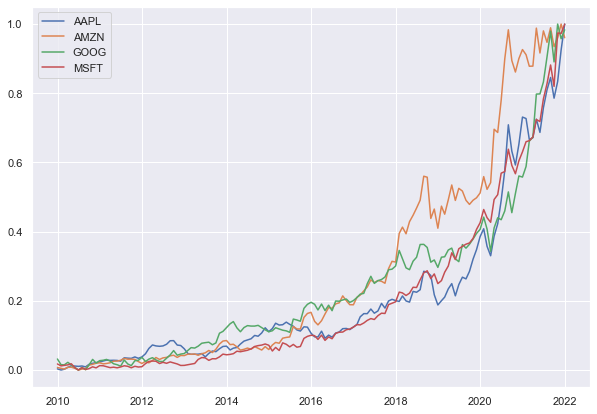

In [43]:
from Tsplot import get_tsplot
prices = prices.resample("M").last()
get_tsplot(time_series=np.array(prices),dates=prices.index,labels=prices.columns,normalize=True)

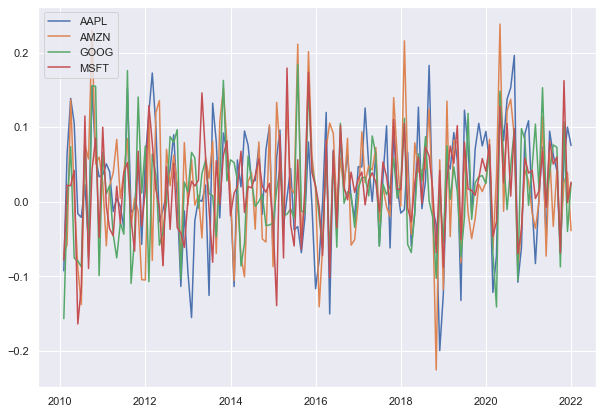

In [44]:
## Retornos 

from Returns import get_returns

returns = get_returns(prices=prices)

get_tsplot(time_series=returns, dates=prices.index[1:], labels=prices.columns, normalize=False)

Despejando sabemos que
$$\boldsymbol{x} = \mathbb{C}^{-1}\boldsymbol{b}$$

In [146]:
### Solo conocemos el vector de retornos, la matriz de varianzas y covarianzas y el retorno objetivo 
## Anualizamos los retornos y las varianzas
n = 4
mu = np.reshape(returns.mean(axis=0)*12,(1,n))
cov = np.cov(returns.T,ddof=1)*12

ones = np.ones((1,n))
zeros = np.zeros((1,n))
mu_0 = 0.25

mu_with_restrictions = np.concatenate((mu,np.array([0,0]).reshape((1,2))),axis=1)
ones_with_restrictions = np.concatenate((ones,np.array([0,0]).reshape((1,2))),axis=1)
zeros_with_restrictions = np.concatenate((zeros,np.array([0.25,1]).reshape((1,2))),axis=1)

C = np.concatenate((
    cov,
    mu.T,
    ones.T
),axis=1)

C = np.concatenate((
    C,
    mu_with_restrictions,
    ones_with_restrictions
),axis=0)

b = zeros_with_restrictions.T

x = np.linalg.inv(C) @ b
x.round(3)


array([[ 0.31 ],
       [ 0.259],
       [ 0.032],
       [ 0.399],
       [-0.151],
       [ 0.   ]])

#### CVOXPT

Para realizar el procedimiento anterior existen diveras librerías con optimizadores QP disponibles, una de estas es cvoxpt.
Se deja como tarea/reto al estudiante comprender la siguiente función

In [147]:
import cvxopt
from cvxopt import matrix
from cvxopt import solvers

def solvers_qp(vcov,mu,optimal_portfolio,inequality=False):
    """
    Definimos la función solvers_qp que utiliza el solvers.qp del módulo cvxopt

    Optimiza un problema de la forma 

    min (1/2)x'Px + q'x
    s.a Gx <= h
        Ax = b

    Si adaptamos esta optimización a nuestro ejercicio de optimización del
    portafolio óptimo entonces tenemos que 
    
    Si inequality = False

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 = 1
    Si inequality = True

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 >= 0
    
    Es decir, podemos restringir la optimización para que la suma de las ponderaciones
    sea uno o bien, para que sea no negativa 

    Parámetros:
    -------------------------------------------------------------------

    vcov : Matriz (n x n) de varianzas y covarianzas


    mu : vector de tamaño (n,) de los retornos esperados de los n activos

    optimal_portfolio : Valor del retorno óptimo, este debe estar dentro de la frontera eficiente
                        puede ser el retorno del portafolio de mínima varianza global, el portafolio
                        óptimo de sharpe, o cualquier otro. 

    inequality : bool , default = False si w'1 = 1 o True si w'1 >= 0

    Ejemplo: 
    -------------------------------------------------------------------
    vcov : (5x5)

        [[0.02450049 0.00388752 0.00228452 0.00095474 0.00308689]
        [0.00388752 0.00874613 0.00182295 0.00094029 0.00445079]
        [0.00228452 0.00182295 0.00385652 0.00142886 0.00119709]
        [0.00095474 0.00094029 0.00142886 0.0021134  0.00087716]
        [0.00308689 0.00445079 0.00119709 0.00087716 0.00734027]]
    mu : (5,)
    
        [0.04029284 0.01008825 0.02163079 0.00754402 0.00529053]

    optimal_portfolio : rpmv

        [0.01000976]

    inequality : False

    [in] solv = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)
        print(solv)

    [out]
        [ 1.26e-02]
        [ 3.92e-02]
        [ 1.56e-01]
        [ 6.81e-01]
        [ 1.10e-01] 
    """
    n = len(mu)
    if inequality == False:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1)),1).T)
        h = matrix(-np.array([optimal_portfolio,1]))
    elif inequality == True:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1),
            -np.diag(np.full(n,1))),1).T)
        h = matrix(-np.concatenate((
            np.array([optimal_portfolio,1]),
            np.zeros(n).reshape(n,1)),0))

    response = np.array(solvers.qp(P=P,q=q,G=G,h=h,show_progress=False)['x']).reshape(-1)
    return response

In [148]:
w_optimos =  solvers_qp(vcov=cov,mu=mu.reshape(-1),optimal_portfolio=0.25,inequality=False)
w_optimos

     pcost       dcost       gap    pres   dres
 0:  1.6244e-02  1.7616e-02  5e-02  1e+00  1e-16
 1:  1.6974e-02  1.7646e-02  9e-04  4e-02  1e-17
 2:  1.7913e-02  1.8472e-02  2e-04  1e-02  1e-17
 3:  1.8812e-02  1.8763e-02  5e-05  5e-17  1e-15
 4:  1.8781e-02  1.8776e-02  5e-06  3e-19  2e-16
 5:  1.8779e-02  1.8778e-02  7e-07  2e-17  9e-15
 6:  1.8778e-02  1.8778e-02  1e-07  6e-17  2e-14
Optimal solution found.


array([0.30936538, 0.25849756, 0.0335313 , 0.39923929])

In [154]:
print(f"""
matriz x calculada por nosotros:
{x.T[:,:-2]}
********************************

Matriz mu_optimos calculada por el optimizador
{w_optimos}
""")


matriz x calculada por nosotros:
[[0.31021607 0.25929114 0.03187698 0.39861581]]
********************************

Matriz mu_optimos calculada por el optimizador
[0.30936538 0.25849756 0.0335313  0.39923929]



In [173]:
print(f"""
Note que:

mu @ x = {mu@x[:-2,:]}

mu @ w_optimos = {mu@w_optimos}

Es lo que conocemos como el retorno óptimo del portafolio rp
""")


Note que:

mu @ x = [[0.25]]

mu @ w_optimos = [0.25000003]



In [177]:
## Calcular la varianza y volatilidad del portafolio usando los pesos óptimos


## El optimizador QP y la frontera eficiente

Ahora, note que el valor de $\mu_{0}$ es arbitrario e indispensable para nuestro problema de optimización. Supongamos ahora que queremos generar una región factible de posibles $\mu_{0}$ de digamos, 100 posibles retornos, pasando desde el mínimo retorno observado hasta el máximo. Esto sería:

In [219]:
# from SolverQP import ownSolverQP

mu_max = np.max(mu)
mu_min = np.min(mu)

retornos_factibles = np.linspace(mu_min,mu_max, 100)
rp_FE = []
sigmap_FE = []
for i in retornos_factibles:
    w_sim = ownSolverQP(returns=returns,mu_0=i)
    rp_sim = mu @ w_sim
    sigmap_sim = w_sim.T @ cov @ w_sim

    rp_FE.append(rp_sim[0,0])
    sigmap_FE.append(sigmap_sim[0,0])
    

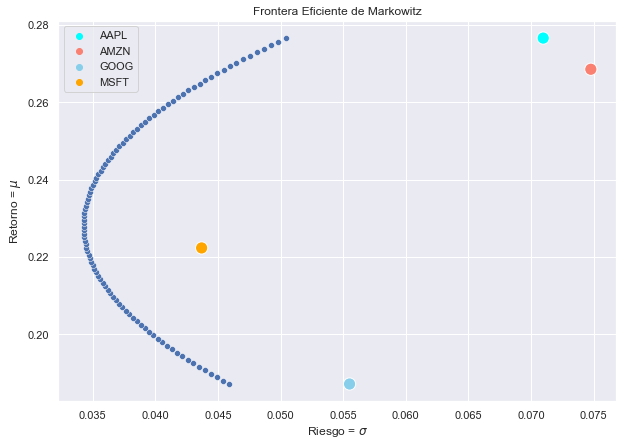

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig = plt.figure(figsize=(10,7))
sns.scatterplot(x=sigmap_FE,y=rp_FE,legend='auto')
sns.scatterplot(x=np.diag(cov).reshape(-1),y=mu.reshape(-1),s=[150]*4,
                hue=["AAPL", "AMZN", "GOOG", "MSFT"],palette=["cyan","salmon","skyblue","orange"])
plt.xlabel(''.join('Riesgo = $\sigma$'))
plt.ylabel(''.join('Retorno = $\mu$'))
plt.title('Frontera Eficiente de Markowitz')
# plt.legend(['Conjunto Factible',"AAPL", "AMZN", "GOOG", "MSFT"])
plt.show()